## 문서 유서도 측정 방법
- 문서와 문서 간의 유사도는 코사인 유사도(Cosine Similarity)를 사용한다. 
- 코사인 유사도란 무엇일까? 아래 강의가 비교적 상세하게 설명하고 있으니, 참고하기를 바란다. 

## 코사인 유사도의 개념

In [ ]:
from IPython.display import HTML

HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/_M-HrmMeMdk" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

- 간단하게 정리하면
  + 코사인 유사도는 두 벡터 사이의 사잇각을 구해서 얼마나 유사한지 수치로 적용한다. 
  + 이 때 사이값의 각도가 줄어들수록 두 벡터간의 관계가 유사하다고 판단하는 것이다. 
- 수식은 다음과 같다. (위키 참조: https://ko.wikipedia.org/wiki/%EC%BD%94%EC%82%AC%EC%9D%B8_%EC%9C%A0%EC%82%AC%EB%8F%84)
- 코사인 유사도가 가장 많이 사용되는 이유는 희소행렬 때문이다. 
- 문서와 문서 벡터간의 크기에 기반한 유클리드 거리 기반 지표는 정확도가 떨어지기 쉽다. 
- 문서가 매우 긴 경우 단어의 빈도수도 더 많을 것이기 때문에 단순하게 빈도수에만 기반해서는 공정한 비교를 할 수 없다. 


### 코사인 유사도의 함수
- 따라서, 서로 간의 문서 유사도를 유사도 기반으로 구해 본다. 
  + 우선 `cos_similarity()` 함수를 작성해본다. 
  + 수식을 구현했다고 보면 된다. 

In [1]:
import numpy as np

def cos_similarity(v1, v2):
  dot_product = np.dot(v1, v2)
  l2_norm = (np.sqrt(sum(np.square(v1))) * np.sqrt(sum(np.square(v2))))
  similarity = dot_product / l2_norm

  return similarity

- `doc_list`로 정의된 3개의 간단한 문서의 유사도를 비교하기 위해 TF-IDF로 벡터화된 행렬로 변환한다. 

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

doc_list = ['if you take the blue pill, the story ends', 
            'if you take the red pill, you stay in Wonderland', 
            'if you take the red pill, I show you how deep the rabbit hole goes']

tfidf_vect_simple = TfidfVectorizer()
feature_vect_simple = tfidf_vect_simple.fit_transform(doc_list)

print(feature_vect_simple.shape)

(3, 18)


- 반환된 행렬은 희소 행렬이므로 이를 해결하도록 합니다. 
  + 밀집 행렬로 변환한 뒤, 정의된 코사인 함수를 측정합니다. 

In [7]:
# TFidfVectorizer transform() 한 결과를 밀집 행렬로 변환
feature_vect_dense = feature_vect_simple.todense()

# 첫 번째 문장과 두 번째 문장의 피처 벡터 추출
vect1 = np.array(feature_vect_dense[0]).reshape(-1, )
vect2 = np.array(feature_vect_dense[1]).reshape(-1, )

# 첫번째 문장과 두 번째 문장의 피처 벡터로 두 개 문장의 코사인 유사도 추출
similarity_simple = cos_similarity(vect1, vect2)
print('문장 1, 문장 2 cosine 유사도: {0:.3f}'.format(similarity_simple))

문장 1, 문장 2 cosine 유사도: 0.402


- 첫 번째 문장과 두 번째 문장의 코사인 유사도는 0.402이며. 이번에는 첫 번째 문장과 세 번째 문장, 그리고 두 번째 문장과 세 번째 문장의 유사도로 측정한다. 

In [9]:
vect1 = np.array(feature_vect_dense[0]).reshape(-1, )
vect3 = np.array(feature_vect_dense[2]).reshape(-1, )

similarity_simple = cos_similarity(vect1, vect3)
print('문장 1, 문장 3 cosine 유사도: {0:.3f}'.format(similarity_simple))

문장 1, 문장 3 cosine 유사도: 0.404


In [11]:
similarity_simple = cos_similarity(vect2, vect3)
print('문장 2, 문장 3 cosine 유사도: {0:.3f}'.format(similarity_simple))

문장 2, 문장 3 cosine 유사도: 0.456


### 사이킷런 코사인 유사도 함수 
- 사이킷런은 코사인 유사도를 측정하기 위해 `sklearn.metrics.pairwise.cosine_similarity API`를 제공한다. 
- `API`를 이용해 앞 예제의 문서 유사도를 측정한다. 
  + `sklearn`의 `cosine_similarity`는 희소 행렬, 밀집 행렬 모두가 가능하다. 

In [12]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(feature_vect_simple[0], feature_vect_simple)
print(similarity_simple_pair)

[[1.         0.40207758 0.40425045]]


- 우선 유사도 값 `1`은 비교 기준인 첫번째 문서 자신에 대한 유사도 측정값을 말합니다. 
- 0.40425045는 첫 번째 문서와 세 번째 문서의 유사도 값을 말한다. 
  + 만약, `1`을 제거하고 싶다면 다음(`feature_vect_simple[1:]`)과 같이 코드를 작성한다. 

In [13]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(feature_vect_simple[0], feature_vect_simple[1:])
print(similarity_simple_pair)

[[0.40207758 0.40425045]]


- `cosine_similarity()`는 쌍으로(pair) 코사인 유사도 값을 제공한다. 


In [15]:
similarity_simple_pair = cosine_similarity(feature_vect_simple, feature_vect_simple)
print(similarity_simple_pair)

[[1.         0.40207758 0.40425045]
 [0.40207758 1.         0.45647296]
 [0.40425045 0.45647296 1.        ]]


## Opinion Review 데이터 세트를 이용한 문서 유사도 측정
- `Opinion Review` 데이터 세트를 이용해 문서 간의 유사도를 측정한다. 

In [16]:
from google.colab import drive # 패키지 불러오기 
from os.path import join  

ROOT = "/content/drive"     # 드라이브 기본 경로
print(ROOT)                 # print content of ROOT (Optional)
drive.mount(ROOT)           # 드라이브 기본 경로 Mount

/content/drive
Mounted at /content/drive


In [17]:
MY_GOOGLE_DRIVE_PATH = 'My Drive/Colab Notebooks/NLP/' # 프로젝트 경로
PROJECT_PATH = join(ROOT, MY_GOOGLE_DRIVE_PATH) # 프로젝트 경로
print(PROJECT_PATH)

/content/drive/My Drive/Colab Notebooks/NLP/


In [19]:
%cd "{PROJECT_PATH}"

/content/drive/My Drive/Colab Notebooks/NLP


In [22]:
import pandas as pd
import glob, os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.stem import WordNetLemmatizer
import nltk
import string

nltk.download('punkt')
nltk.download('wordnet')

remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
lemmar = WordNetLemmatizer()

def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]

def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

# 폴더 경로(디렉터리) 설정
path = r'data/OpinosisDataset1.0/topics'

all_files = glob.glob(os.path.join(path, "*.data"))
print("전체 파일 개수:", len(all_files))
print(all_files[:2])

filename_list = []
opinion_text = []

# 개별 파일의 파일명은 filename_list
# 개별 파일의 파일 내용은 `DataFrame 로딩 후 다시 string으로 변환해 `opinion_text list`로 취합한다. 

for file_ in all_files:
  # 개별 파일을 읽어서 데이터 프레임으로 생성
  df = pd.read_table(file_, index_col=None, header=None, encoding='latin1')
  # print(df.head())
  df.columns = ['text']
  # print(df.head())

  # 절대 경로로 주어진 파일명을 가공. 리눅스에서 수행 시 \\를 /로 변경
  # 맨 마지막 .data 확장자도 제거
  filename_ = file_.split('/')[-1] # 만일 Linux에서 수행시에는 아래 \\를 / 변경. 맨 마지막 .data 확장자도 제거
  filename = filename_.split('.')[0]

  # 파일명 list와 파일 내용 list에 파일명과 파일 내용을 추가
  filename_list.append(filename)
  text_data = df.to_string()
  opinion_text.append(df.text.to_string(index=None))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
전체 파일 개수: 51
['data/OpinosisDataset1.0/topics/battery-life_ipod_nano_8gb.txt.data', 'data/OpinosisDataset1.0/topics/screen_ipod_nano_8gb.txt.data']


In [23]:
# 파일명 list
document_df = pd.DataFrame({'filename': filename_list, 'opinion_text': opinion_text})

tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize, stop_words="english", ngram_range=(1, 2), min_df=0.05, max_df=0.85)

# opinion_text
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [24]:
km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state = 0)
km_cluster.fit(feature_vect)

cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_
document_df['cluster_label'] = cluster_label

- 이 중 호텔을 주제로 군집화된 문서를 이용해 특정 문서와 다른 문서 간의 유사도를 알아보도록 한다. 
- 먼저 이를 위해 호텔을 주제로 군집화된 데이터를 먼저 추출하고 이 데이터에 해당하는 `TfidfVectorizer`의 데이터를 추출한다. 

In [27]:
document_df[document_df['cluster_label'] == 2].head()

,filename,opinion_text,cluster_label
20,rooms_swissotel_chicago,The Swissotel is one of our favorite hotels i...,2
22,food_holiday_inn_london,The room was packed to capacity with queues ...,2
23,food_swissotel_chicago,The food for our event was delicio...,2
25,service_holiday_inn_london,"not customer, oriented hotelvery low service ...",2
26,location_holiday_inn_london,Great location for tube and we crammed in a ...,2


In [36]:
from sklearn.metrics.pairwise import cosine_similarity

# cluster label = 2
hotel_indexes = document_df[document_df['cluster_label'] == 2].index
print('호텔로 군집화 된 문서들의 DataFrame Index:', hotel_indexes)

# 호텔로 군집화된 데이터 중 첫 번째 문서를 추출해 파일명 표시. 
# 만약 0 대신 다른 문서를 추출하고자 한다면 [0] 대신 다른 입력값을 넣어서 확인할 수도 있다. 
comparison_docname = document_df.iloc[hotel_indexes[0]]['filename']

print('##### 비교 기준 문서명 ', comparison_docname, '와 타 문서 유사도 ####')

# 이제 index 객체를 feature_vect로 입력해 호텔 군집화된 feature_vect 추출한 뒤 이를 이용해 호텔로 군집화된 문서 중 첫 번째 문서와 다른 문서 간의 코사인 유사도를 측정한다. 
similarity_pair = cosine_similarity(feature_vect[hotel_indexes[0]], feature_vect[hotel_indexes])
print(similarity_pair)

호텔로 군집화 된 문서들의 DataFrame Index: Int64Index([20, 22, 23, 25, 26, 29, 31, 32, 33, 39, 40, 41, 42, 46, 48, 49], dtype='int64')
##### 비교 기준 문서명  food_holiday_inn_london 와 타 문서 유사도 ####
[[1.         0.14391558 0.14693066 0.31990344 0.23653209 0.40809492
  0.268475   0.17844712 0.77533576 0.39558479 0.14740101 0.28546014
  0.08130975 0.09969683 0.23792223 0.89317266]]


- 단순히 숫자로만 표시해서는 직관적으로 문서가 어느 정도 유사도를 가지는지 이해하기 어려울 수 있어서, 이를 정렬하고 시각화 해보도록 한다. 
- `Cosine_similarity()`는 쌍 형태의 `ndarray`를 반환하므로 이를 판다스 인덱스로 이용하기 위해 `reshpae(-1)`로 차원을 변경한다. 

Text(0.5, 1.0, 'food_holiday_inn_london')

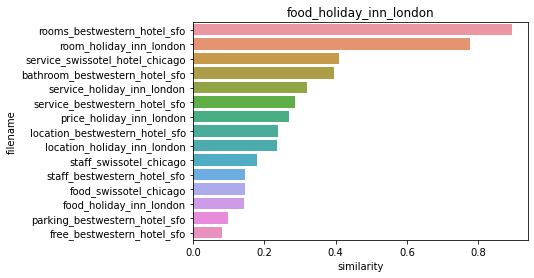

In [37]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 첫 번째 문서와 타 문서 간 유사도가 큰 순으로 정렬한 인덱스를 추출
sorted_index = similarity_pair.argsort()[:, ::-1]
sorted_index = sorted_index[:, 1:]

# 유사도가 큰 순으로 hotel_indexes를 추출해 재정렬
hotel_sorted_indexes = hotel_indexes[sorted_index.reshape(-1)]

# 유사도가 큰 순으로 유사도 값을 재정렬하되 자기 자신은 제외
hotel_1_sim_value = np.sort(similarity_pair.reshape(-1))[::-1]
hotel_1_sim_value = hotel_1_sim_value[1:]

# 유사도가 큰 순으로 정렬된 인덱스와 유사도 값을 이용해 파일명과 유사도 값을 막대 그래프로 시각화
hotel_1_sim_df = pd.DataFrame()
hotel_1_sim_df['filename'] = document_df.iloc[hotel_sorted_indexes]['filename']
hotel_1_sim_df['similarity'] = hotel_1_sim_value

# print(hotel_1_sim_df)

sns.barplot(x = 'similarity', y = 'filename', data = hotel_1_sim_df)
plt.title(comparison_docname)

- 첫번째 문서인 `rooms_swissotel_chicago`와 가장 유사한 문서는 `rooms_bestwestern_hotel_sfo`인 것을 확인할 수 있다. 